# 📌 Problem Statement:
The objective is to predict whether a loan applicant is likely to be approved for a loan
based on historical data. I will handle missing values, perform exploratory analysis, 
build a predictive model, and evaluate its performance.

In [153]:
# STEP 1: Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Set style
sns.set(style='whitegrid')

In [156]:
# STEP 2: Load the Excel file
df = pd.read_csv("credit_risk_prediction.csv")  # Replace with the exact filena

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [176]:
# STEP 3: Fill missing values using mode for all columns

missing = df.isnull().sum()
print("Missing Values Summary before filling:")
print(missing)

# Fill all columns (numeric + categorical) with mode
for col in df.columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

# Confirm all missing values handled
print("\nAll missing values handled?")
print(df.isnull().sum().sum() == 0)

Missing Values Summary before filling:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All missing values handled?
True


<h2><b>Visualizing Features</b></h2>

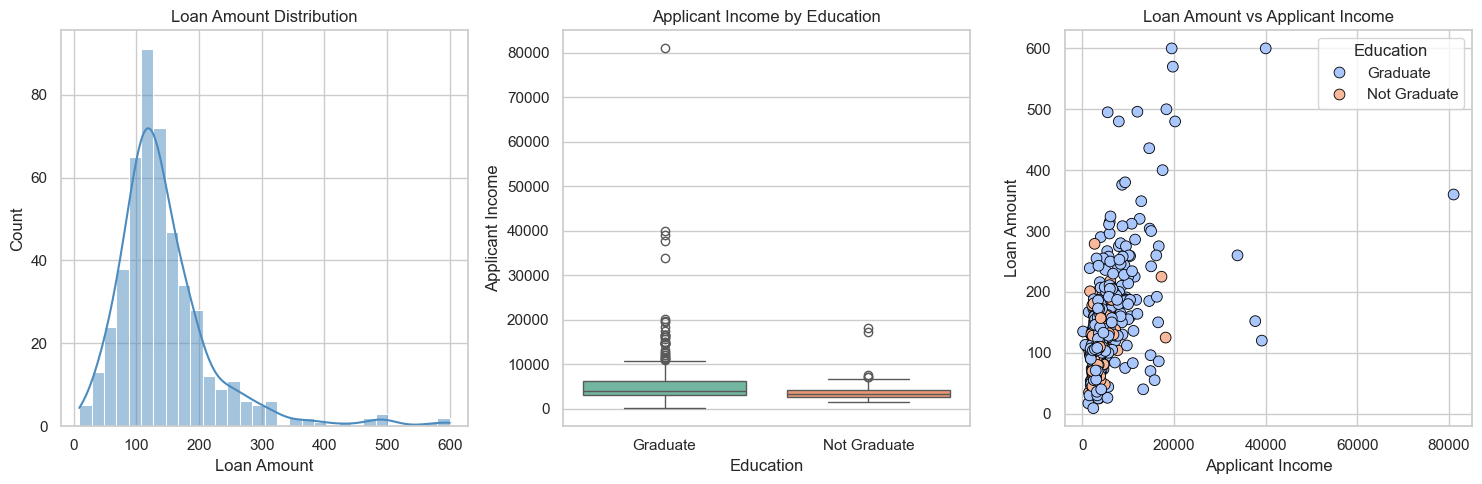

In [177]:
# STEP 4: Exploratory Data Analyss (Visualizing key features as loan amount, educaion and income)

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Set up figure
plt.figure(figsize=(15, 5))

# 1 Loan Amount Distribution (Histogram)
plt.subplot(1, 3, 1)
sns.histplot(df['LoanAmount'], bins=30, kde=True, color='#4B8BBE')
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Count")

# 2 Applicant Income by Education (Boxplot) — using hue and legend=False
plt.subplot(1, 3, 2)
sns.boxplot(
    data=df,
    x='Education',
    y='ApplicantIncome',
    hue='Education',
    palette='Set2',
    dodge=False,
    legend=False  # Prevents legend from appearing
)
plt.title("Applicant Income by Education")
plt.xlabel("Education")
plt.ylabel("Applicant Income")

# Scatter plot (Income vs Loan, colored by Education)
plt.subplot(1, 3, 3)
sns.scatterplot(
    data=df,
    x='ApplicantIncome',
    y='LoanAmount',
    hue='Education',
    palette='coolwarm',
    s=60,
    edgecolor='black'
)
plt.title("Loan Amount vs Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.legend(title='Education')

# Final layout adjustment
plt.tight_layout()
plt.show()

In [178]:
# STEP 5: Encode categorical columns and clean data
import pickle

# Copy to protect original data
df_imputed = df.copy()

# Drop ID column
df_imputed.drop(columns=['Loan_ID'], inplace=True)

# Clean binary categorical columns
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']
for col in binary_cols:
    df_imputed[col] = df_imputed[col].astype(str).str.strip()

# Manual binary mapping
manual_mappings = {
    'Gender': {'Male': 1, 'Female': 0},
    'Married': {'Yes': 1, 'No': 0},
    'Education': {'Graduate': 1, 'Not Graduate': 0},
    'Self_Employed': {'Yes': 1, 'No': 0},
    'Loan_Status': {'Y': 1, 'N': 0}
}
for col, mapping in manual_mappings.items():
    df_imputed[col] = df_imputed[col].map(mapping)

# Encode Dependents
df_imputed['Dependents'] = df_imputed['Dependents'].astype(str).str.strip().replace('3+', '3').astype(int)

# Encode Property_Area manually to keep 0, 1, 2
property_mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
df_imputed['Property_Area'] = df_imputed['Property_Area'].astype(str).str.strip().map(property_mapping)

In [186]:
# STEP 6: Define features (X) and target variable (y)

X = df_imputed.drop('Loan_Status', axis=1)
y = df_imputed['Loan_Status']


<h2><b>Splitting Dataset for Test and Train</b></h2>

In [187]:
# STEP 7: Split dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [188]:
# STEP 8: Applyng StandardScaler

from sklearn.preprocessing import StandardScaler

num_cols_to_scale = [
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term'
]

scaler = StandardScaler()

X_train[num_cols_to_scale] = scaler.fit_transform(
    X_train[num_cols_to_scale]
)

X_test[num_cols_to_scale] = scaler.transform(
    X_test[num_cols_to_scale]
)


<h2><b>Evaluation</b></h2>

Logistic Regression Accuracy: 82.29 %


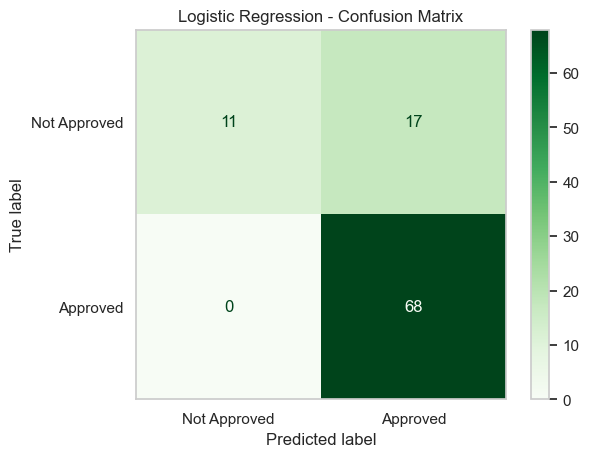

In [193]:
# STEP 9: Train Decision Tree Classifier

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = lr_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=["Not Approved", "Approved"],
    cmap="Greens"
)
plt.title("Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()

<h2><b>Conclusion</b></h2>


In [ ]:
The Logistic Regressio achieved an accuracy of 82%, which indicates moderate performance.
This means the model correctly predicts about 8 out of 10 loan approval outcomes.

Insights:
- Feature analysis revealed that credit history, loan amount, income, and education status played key roles.
- However, the relatively accuracy suggests the model may have limited predictive patterns.
- Future improvements could involve more feature engineering (e.g., Random Forest), or hyperparameter tuning.

Recommendation:
To improve results, consider cleaning missing values more deeply, adding more relevant features, or applying advanced algorithms.